In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)

Welcome to JupyROOT 6.12/06


In [2]:
outfile = r.TFile("./WigglePlot.root","RECREATE")
f = r.TFile("./gm2offline_ana_7893458_15937.00027.root")
f.cd("clusterTree")
f.ls()
t = f.Get("clusterTree").Get("clusters")

TFile**		./gm2offline_ana_7893458_15937.00027.root	
 TFile*		./gm2offline_ana_7893458_15937.00027.root	
  TDirectoryFile*		clusterTree	clusterTree (ClusterTree) folder
   KEY: TTree	clusters;94	clusters
   KEY: TTree	clusters;93	clusters
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder


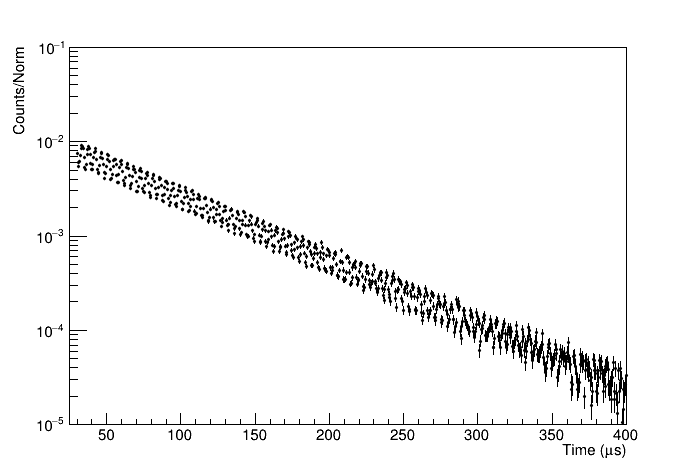

In [3]:
#r.enableJSVis()
#r.disableJSVis()
#%jsroot on
c = r.TCanvas()
c.SetLogy()
dong = "caloNum == 7 && energy > 1300 && energy < 3000; Time (#mus); Counts/Norm"
h = r.TH1D("h",dong,750,25,400)
h.SetMarkerColor(1)
h.SetMarkerStyle(8)
h.SetLineColor(1)
h.SetMarkerSize(.25)
t.Draw("time*1.25/1000>>h","caloNum == 7 && energy > 1300 && energy < 3000 && time>24000.0 && time <592000.0","goff")
norm = h.GetEntries()
h.Scale(1/norm)
h.GetYaxis().SetRangeUser(.00001,.1)
h.Draw("E0 P0")
#h.Fit("expo")
#rp1 = r.TRatioPlot(h)
#rp1.Draw()
#rp1.GetLowerRefYaxis().SetTitle("ratio")
#h.SetTitle("")
#c.BuildLegend()
h.SetTitle("")
outfile.cd()
h.Write("wiggleNoFit")
c.Draw()

In [4]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [5]:
func = r.TF1("func", blinded_wiggle, 30,350,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(1500,64.4,0.4,0,0)
func.SetLineColor(2)
func.SetNpx(1000)

40135

 FCN=711.42 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         804 TOTAL
                     EDM=1.11877e-05    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.24053e-02   2.67959e-05  -1.44399e-08  -4.43049e-02
   2  #tau         6.43622e+01   8.18101e-02  -1.93682e-05   6.45201e-05
   3  A            2.77962e-01   1.58647e-03  -4.05975e-06   5.56317e-04
   4  R            1.06211e+01   6.84226e+01   1.99179e-02  -6.90668e-08
   5  #phi        -1.04525e+00   1.07698e-02   1.07698e-02   2.93932e-03


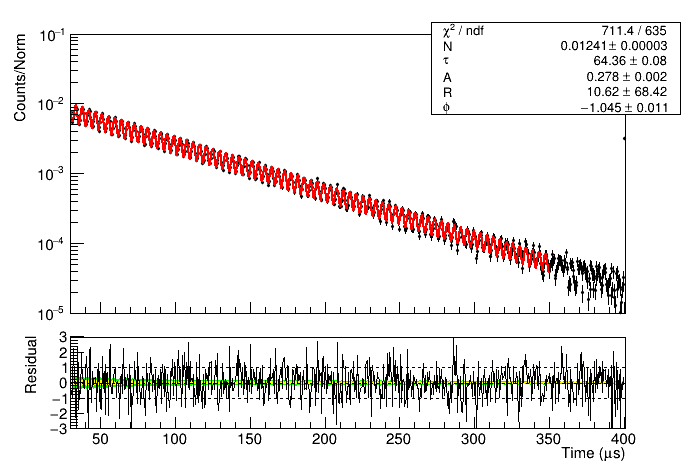

In [6]:
r.gStyle.SetOptFit(111)
h.Draw()
h.GetXaxis().SetRangeUser(30,500)
h.Fit('func','REM')
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
rp1 = r.TRatioPlot(h)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("Residual")
rp1.GetLowerRefYaxis().SetRangeUser(-3,3)
c.Draw()
func.Write("wiggleFit")
h.Write("wiggleFitHisto")
c.Write("wiggleRatioPlot")

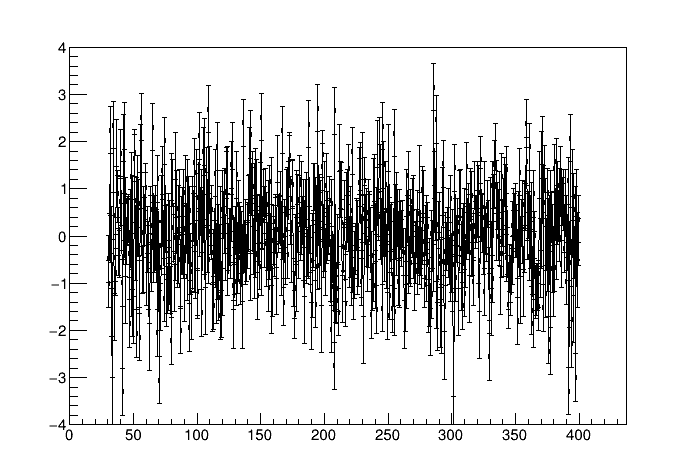

In [7]:
tgraph = rp1.GetCalculationOutputGraph()
c4 = r.TCanvas()
tgraph.Draw()
tgraph3 = tgraph.Clone()
tgraph3.GetYaxis().SetRangeUser(-4,4)
tgraph3.Draw("apl")
c4.Draw()

Info in <TCanvas::Print>: eps file ./wiggle_30_70_fit.eps has been created


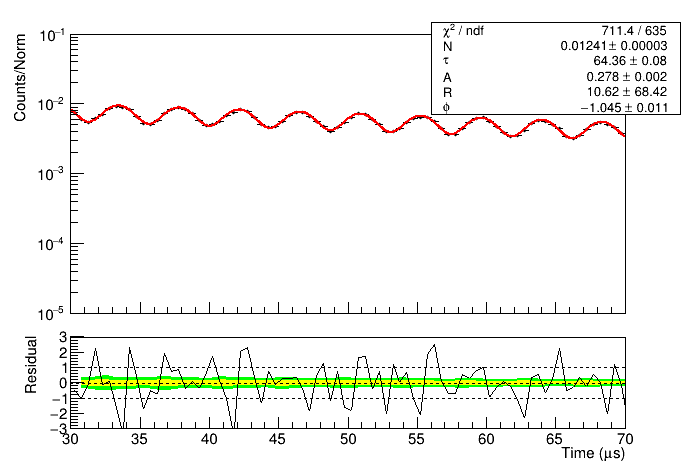

In [8]:
h.GetXaxis().SetRangeUser(30,70)
c.Draw()
c.Print("./wiggle_30_70_fit.eps")

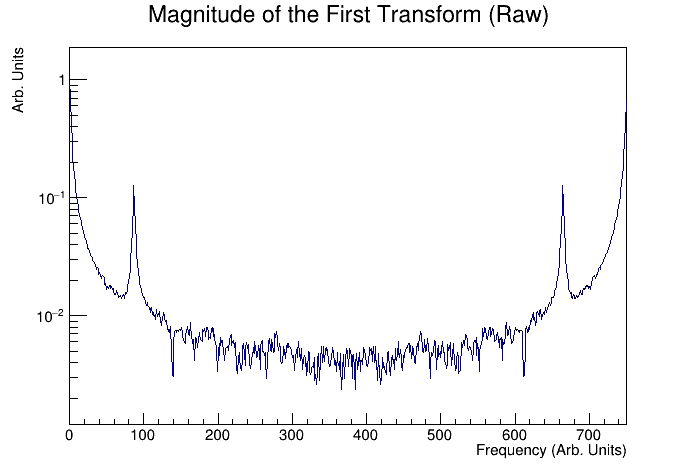

In [9]:
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = h.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (Raw)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
#normXform = hxform.GetEntries()
#hxform.Scale(1/normXform)
#hxform.GetXaxis().SetRangeUser(0,limmax)
c2 = r.TCanvas()
c2.cd()
c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (Arb. Units)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("P0 L")
hxform.Write("wiggleXform")
c2.Draw()

In [64]:
Npart = h.GetSize()
minBinCenter = h.GetXaxis().GetBinCenter(0)
maxBinCenter = h.GetXaxis().GetBinCenter(Npart)
capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
hxform.SetBins(750,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,1)

752 376.0 24.75 400.75
0.5 0.0026595744680851063
4.0 1.9999999999999998


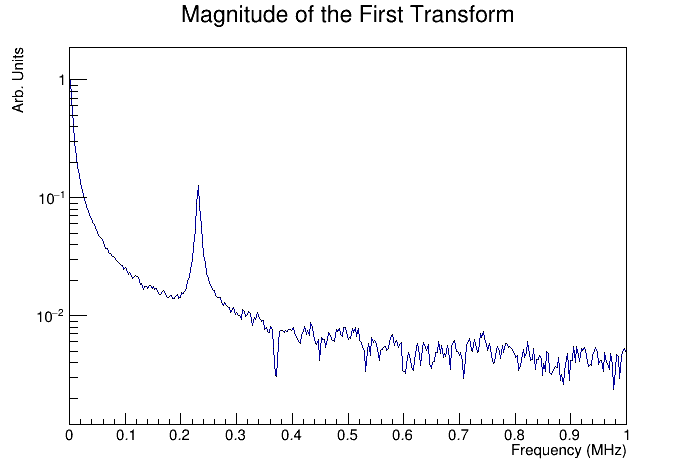

In [65]:
#hxform.Sumw2()
c2 = r.TCanvas()
c2.cd()
c2.SetLogy()
hxform.SetTitle("Magnitude of the First Transform")
normXform = hxform.GetEntries()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.Draw("P0 L")
hxform.Write("wiggleXform")
c2.Draw()

740 369.5 30.25 399.75
0.49932432432432433 0.0027063599458728013
4.005412719891746 2.002706359945873


Warning in <TFile::Append>: Replacing existing TH1: hresid (Potential memory leak).


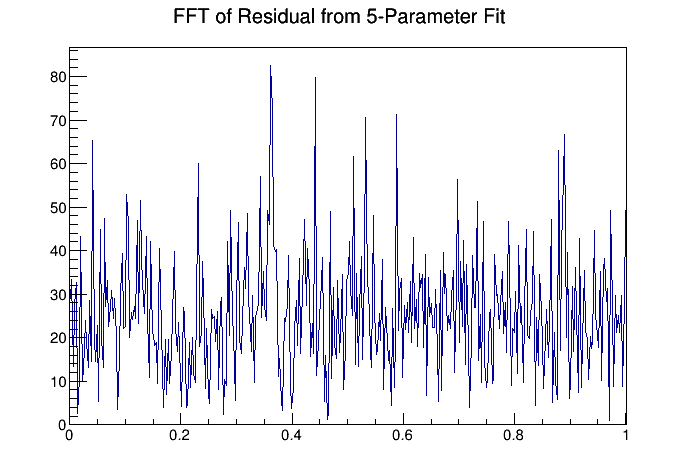

In [66]:
c3 = r.TCanvas()
#tgraph3.Draw()
c3.Draw()
residualN = tgraph3.GetN()
listx = []
listy = []
for i in range(0,residualN):
    xi = r.Double(9999)
    yi = r.Double(9999)
    tgraph3.GetPoint(i,xi,yi)
    listx.append(xi)
    listy.append(yi)
#print(listy)
import numpy
ffty = numpy.abs(numpy.fft.fft(listy))
#print(ffty)

Npart = residualN
minBinCenter = listx[0]
maxBinCenter = listx[len(listx)-1]
capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)

hresid = r.TH1D("hresid","FFT of Residual from 5-Parameter Fit",residualN,0,residualN)
for i in range(0,residualN):
    hresid.SetBinContent(i,ffty[i])
hresid.SetBins(750,0,limmaxMHz)
hresid.GetXaxis().SetRangeUser(0,limmaxMHz/2.0)
hresid.Draw("P0 L")

Info in <TCanvas::Print>: eps file ./FFT_all.eps has been created


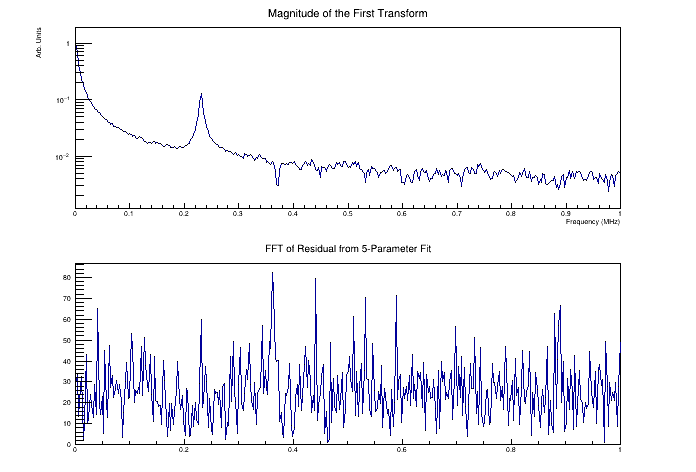

In [68]:
c4 = r.TCanvas()
c4.SetLogy()
c4.Divide(1,2)
c4.cd(1)
r.gPad.SetLogy()
hxform.Draw("P0 L")
c4.cd(2)
#r.gPad.SetLogy()
hresid.Draw("P0 L")
c4.Draw()
c4.Print("./FFT_all.eps")

In [11]:
def blinded_wiggle_cbo(x, p):
    norm     = p[0]
    life     = p[1]
    asym     = p[2]
    R        = p[3]
    phi      = p[4]
    A1       = p[5]
    A2       = p[6]
    A3       = p[7]
    lifeCBO  = p[8]
    omegaCBO = p[9]
    phiCBO1  = p[10]
    phiCBO2  = p[11]
    phiCBO3  = p[12]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
    
    cCBO = 1-math.exp(-time/lifeCBO)*A1*math.cos(omegaCBO*time + phiCBO1)
    ACBO = asym * (1 - math.exp(-time/lifeCBO) * A2 * math.cos(omegaCBO*time + phiCBO2))
    phiCBO = phi + math.exp(-time/lifeCBO)*A3*math.cos(omegaCBO*time + phiCBO3)
    
    return norm * math.exp(-time/life) * cCBO * (1 - ACBO*math.cos(omega*time + phiCBO))

In [12]:
func = r.TF1("CBOfit", blinded_wiggle_cbo, 30,350,13)
func.SetParNames('N','#tau','A','R','#phi','A_{1}','A_{2}','A_{3}','#tau_{CBO}','#omega_{CBO}','#phi_{CBO - 1}')
func.SetParName(11,'#phi_{CBO - 2}')
func.SetParName(12,'#phi_{CBO - 3}')
func.SetParLimits(4,-6.3,6.3) #Phases should be restricted to +/- 2Pi
func.SetParLimits(8,0.000000001,10000) #Avoid divide by 0 error
func.SetParLimits(10,-6.3,6.3) 
func.SetParLimits(11,-6.3,6.3)
func.SetParLimits(12,-6.3,6.3)
func.SetParameters(1500,64.4,0.4,0,0,1,1,1,.01,.01,0)
func.SetParameter(11,0)
func.SetParameter(12,0)
func.SetLineColor(2)
func.SetNpx(1000)

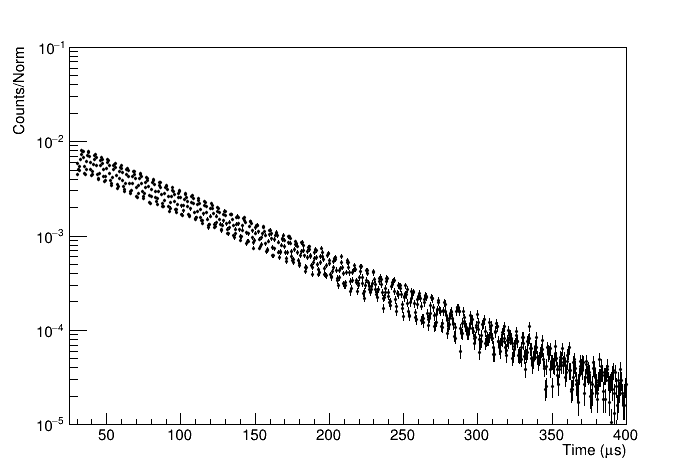

In [13]:
c = r.TCanvas()
c.SetLogy()
dong = "caloNum == 7 && energy > 1300 && energy < 3000; Time (#mus); Counts/Norm"
h = r.TH1D("h",dong,850,25,400)
h.SetMarkerColor(1)
h.SetMarkerStyle(8)
h.SetLineColor(1)
h.SetMarkerSize(.25)
t.Draw("time*1.25/1000>>h","caloNum == 7 && energy > 1300 && energy < 3000 && time>24000.0 && time <592000.0","goff")
norm = h.GetEntries()
h.Scale(1/norm)
h.GetYaxis().SetRangeUser(.00001,.1)
h.Draw("E0 P0")
h.SetTitle("")
c.Draw()

 FCN=1841.89 FROM MIGRAD    STATUS=FAILED      21945 CALLS       21946 TOTAL
                     EDM=0.00076405    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            3.33661e-01   4.71629e-03   8.10388e-06  -1.58427e+00
   2  #tau         5.68521e+01   2.38884e-01   7.18522e-04  -1.75689e-02
   3  A            3.88237e-01   2.54166e-02   4.65331e-05  -5.63868e-01
   4  R            2.33417e+04   3.61420e+02   7.67955e-01  -1.29050e-05
   5  #phi         5.88301e+00   6.38255e-02   5.39415e-05   3.25931e-01
   6  A_{1}        1.02844e+00   5.47450e-04   1.01212e-06   5.92343e+01
   7  A_{2}       -3.63460e-01   5.78942e-02   1.10104e-04  -1.16447e-01
   8  A_{3}        1.50730e+02   1.06363e+00   1.79319e-03   6.91861e-03
   9  #tau_{CBO}   5.72822e+03   1.44449e+02   6.94452e-05  -7.57116e-01
  10  #omega_{CBO}  -2.45692e-04   3.69782e

Warning in <Fit>: Abnormal termination of minimization.


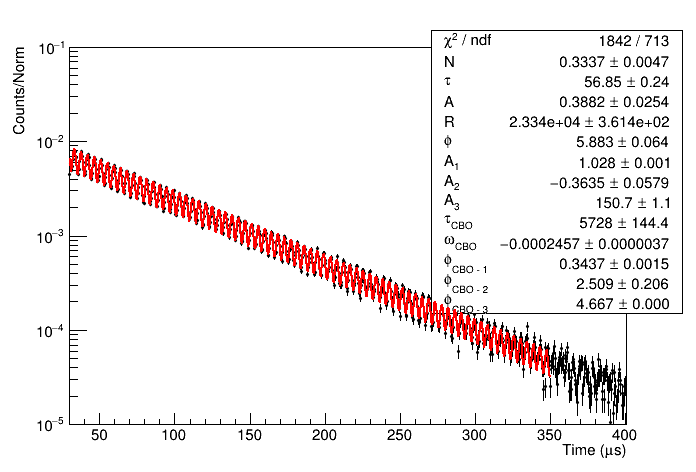

In [14]:
r.Math.MinimizerOptions.SetDefaultMaxFunctionCalls(30000)
r.gStyle.SetOptFit(111)
h.GetXaxis().SetRangeUser(30,500)
h.GetYaxis().SetRangeUser(0.00001,0.1)
h.Draw()
h.Fit('CBOfit','REB')
func.Draw("SAME")
c.Draw()

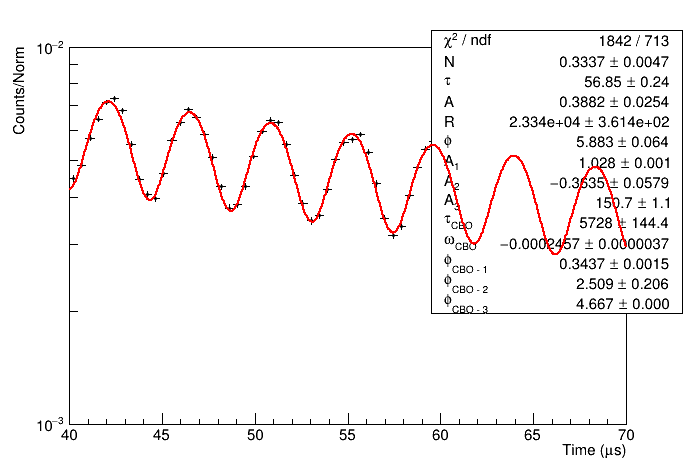

In [15]:
h.GetXaxis().SetRangeUser(40,70)
h.GetYaxis().SetRangeUser(0.001,0.01)
c.Draw()

31147

Error in <TBackCompFitter::GetConfidenceIntervals>: Cannot compute confidence intervals with an invalide fit result
Error in <TBackCompFitter::GetConfidenceIntervals>: Cannot compute confidence intervals with an invalide fit result


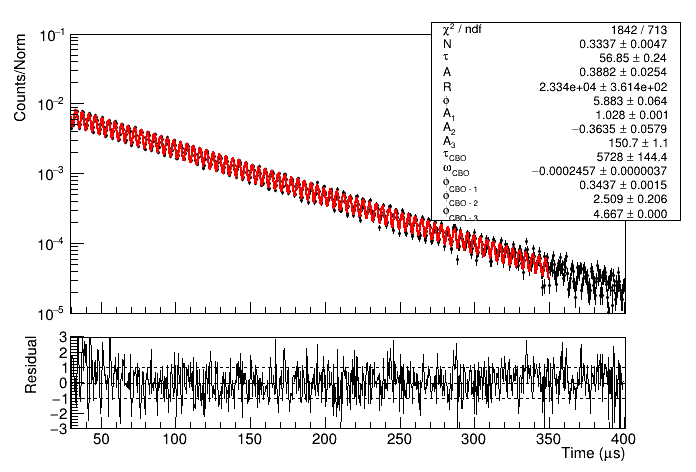

In [16]:
h.GetXaxis().SetRangeUser(30,500)
h.GetYaxis().SetRangeUser(0.00001,0.1)
h.Draw()
rp2 = r.TRatioPlot(h)
rp2.Draw()
rp2.GetLowerRefYaxis().SetTitle("Residual")
rp2.GetLowerRefYaxis().SetRangeUser(-3,3)
c.Draw()
func.Write("wiggleFit13")
h.Write("wiggleFitHisto13")
c.Write("wiggleRatioPlot13")

20935

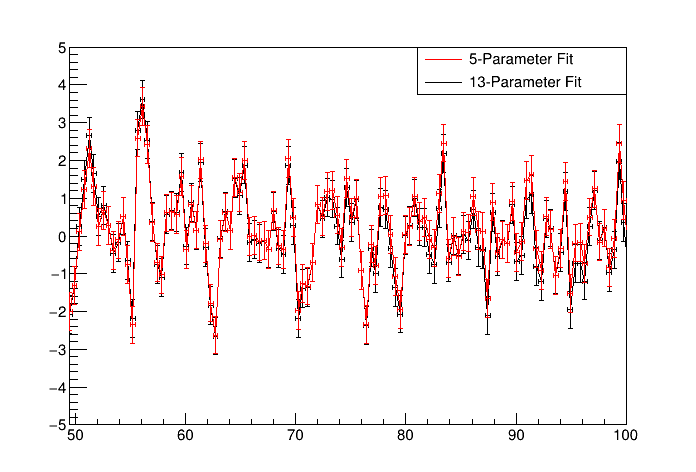

In [17]:
tgraph2 = rp2.GetCalculationOutputGraph()
c3 = r.TCanvas()
tgraph2.Draw("al")
tgraph2.GetYaxis().SetRangeUser(-5,5)
tgraph2.GetXaxis().SetRangeUser(50,100)
tgraph3.SetMarkerColor(2)
tgraph3.SetLineColor(2)
tgraph3.Draw("SAME")
#c3.BuildLegend()
leg = r.TLegend(0.6,0.8,0.9,0.9)
leg.AddEntry(tgraph3,"5-Parameter Fit","pl")
leg.AddEntry(tgraph2,"13-Parameter Fit","pl")
leg.Draw()
c3.Draw()
c3.Write("5ParamVs13Param")

In [78]:
outfile.Close()